In [694]:
import pandas as pd
import random as rd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.stats.api as sms
import statsmodels.api as sm
import statsmodels.formula.api as smf
import itertools
from sklearn.linear_model import LassoCV
from sklearn import linear_model
import patsy
import math
import scipy
from __future__ import division
%matplotlib inline

# Q1
## pt.f

In [932]:
counts = 0
for i in range (1000):
    sset = np.random.poisson(2.0, 20)
    W = ((sum(sset)/20)-2.0)/(math.sqrt((sum(sset)/400)))   
    p= 2*(1-scipy.stats.norm.cdf(abs(W)))
    if p <= 0.05:
        counts += 1
print "frequency is "+str(counts/1000)
print "T1 Error rate is "+str(counts/1000. - 0.05 )+" close to 0.05"

frequency is 0.061
T1 Error rate is 0.011 close to 0.05


## pt.h

In [940]:
counts=0
for i in range (1000):
    sset = np.random.poisson(2, 20)
    se = math.sqrt(1/sum(sset))
    CI_up = math.log((sum(sset))/20)+1.96*se
    CI_lo = math.log((sum(sset))/20)-1.96*se
    if (math.log(2)<= CI_up) and (math.log(2)>= CI_lo):
        counts +=1
print "T1 Error is ", str(1-float(captured)/1000-0.05) +" close to 0.05"

T1 Error is  -0.007 close to 0.05


## pt.i

In [942]:
former_smaller = 0
for i in range (1000):
    sset = np.random.poisson(2, 20)
    se_e = math.sqrt((float(sum(sset))/400))
    e_CI_up = float(sum(sset))/20+1.96*se_e
    e_CI_lo = float(sum(sset))/20-1.96*se_e
    se_g = math.sqrt(float(1)/sum(sset))
    g_CI_up = math.log(float(sum(sset))/20)+1.96*se_g
    g_CI_lo = math.log(float(sum(sset))/20)-1.96*se_g 
    if log_diff<diff:
        former_smaller+=1
print "the former is larger for",former_larger,"times"
print "log of interval from e is never smaller than interval from g"

the former is larger for 0 times
log of interval from e is never smaller than interval from g


### It can be concluded that by looking at T1 error for G
### smaller and CI for G is smaller. Log(lamdba) is a better
### parameter of estimating

# Q4
## pt.a

In [485]:
red = pd.read_csv("winequality-red.csv")
white = pd.read_csv("winequality-white.csv")
red = red.assign(wine_type = 1)
white = white.assign(wine_type = 0)
df = pd.concat([red,white])

## pt.b

In [716]:
rand = np.array(rd.sample(xrange(len(df)),5000))
train = df.iloc[rand]
test = df.loc[~df.index.isin(train.index)]

## pt.c

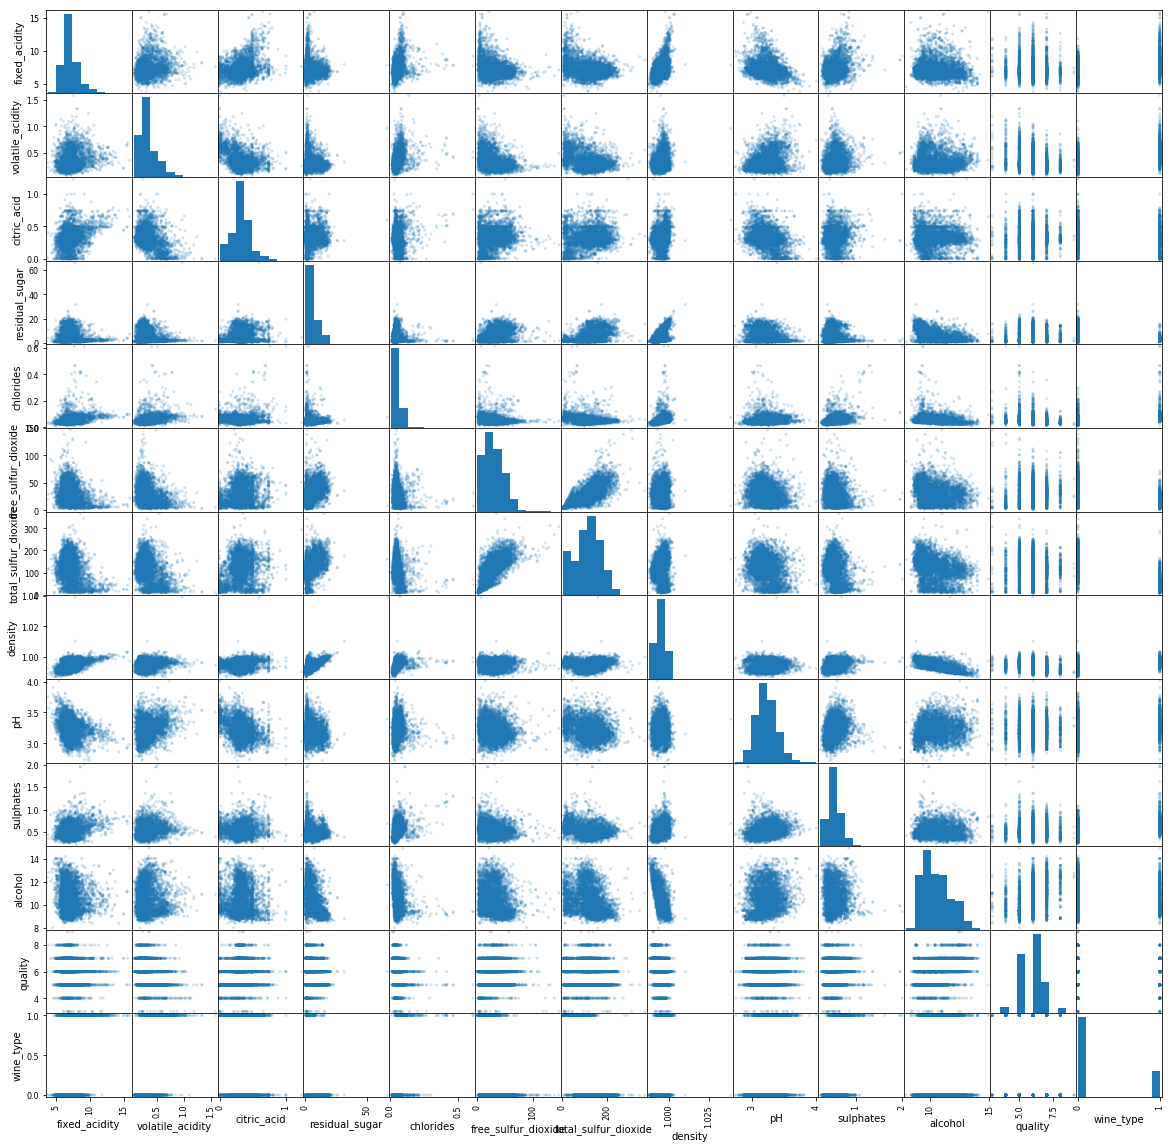

In [10]:
scatter_matrix(train, alpha=0.2, figsize=(20, 20), diagonal='hist')
plt.show()

### notable correlation pair:
[fixed_acidity, volatile_aciditiy],  [free_sulfur_dio, total_sulfur_dio]
reason: 
### covariates to transform:
1 PH 2 add variable: sulphate x winetype
reason: 1 PH is measured on a log scale, so if it would be better to transform it back
        2 sulphate seem to have a different impact on white wine from red wine (by adding the product
        ,one can see the difference)

## pt.d

In [947]:
def cross_valid(data):
    rand = np.array(rd.sample(xrange(len(data)),4000))
    cv_train = data.iloc[rand]
    cv_test = data.loc[~data.index.isin(cv_train.index)]
    lm = smf.ols('quality ~ '+' + '.join(list(set(df.columns)-{'quality'}))
                 ,data = cv_train).fit()
    rsq = 1. - np.sum((lm.predict(cv_test)-cv_test['quality'])**2)/np.sum((
        cv_test['quality'].mean()-cv_test['quality'])**2)
    return rsq


lm = smf.ols('quality ~ '+' + '.join(list(set(df.columns)-{'quality'})),
             data = train).fit()
print 'Here is in-sample R-square:'+str(lm.rsquared)

av_rsquare = 0
for i in range(100):
    av_rsquare += cross_valid(train)/100
print "Here is cross-validation out-of-sample R-square  "+str(av_rsquare)

rsq = 1. - np.sum((lm.predict(test)-test['quality'])**2)/np.sum((
    test['quality'].mean()-test['quality'])**2)
print 'Here is the out-of-sample R-square:'+str(rsq)

Here is in-sample R-square:0.2973643614938224
Here is cross-validation out-of-sample R-square  0.285912982122
Here is the out-of-sample R-square:0.285461561633


### In-sample Rsquare: 0.302 Out-sample Rsquare: 0.2727

## pt.e

In [948]:
def trans_data(data):
    data = data.assign(new_line = data['wine_type']*data['sulphates'])
    data['pH'] = np.exp(data['pH'])
    return data
trans_train = trans_data(train)
trans_test = trans_data(test)

lm = smf.ols('quality ~ '+' + '.join(list(set(trans_train.columns)-{'quality'})),
             data = trans_train).fit()
print 'Here is in-sample R-square:'+str(lm.rsquared)
rsq = 1. - np.sum((lm.predict(trans_test)-trans_test['quality'])**2)/np.sum((
    trans_test['quality'].mean()-trans_test['quality'])**2)
print 'Here is the out-of-sample R-square:'+str(rsq)


Here is in-sample R-square:0.29699511811017687
Here is the out-of-sample R-square:0.284396209034


### It did not change both in-sample and out-of-sample Rsquare by much (+- 0.01)

## pt.f

In [951]:
two_way = 'quality ~ '+' + '.join(list(set(df.columns)-{'quality'})+[
    '%s:%s'%v for v in itertools.combinations(set(df.columns)-{'quality'},2)])
lm = smf.ols(two_way,data = train).fit()
print 'Here is in-sample R-square:'+str(lm.rsquared)
rsq = 1. - np.sum((lm.predict(test)-test['quality'])**2)/np.sum((
    test['quality'].mean()-test['quality'])**2)
print 'Here is the out-of-sample R-square:'+str(rsq)

Here is in-sample R-square:0.3706732039119638
Here is the out-of-sample R-square:0.263019422368


### In-sample Rsquare: 0.368 Out-sample Rsquare: 0.272

## pt.g

In [492]:
singlefeatures = set(df.columns)-{'quality'}
interactions = ['%s:%s'%v for v in itertools.
                combinations(singlefeatures,2)]

In [960]:
# Forward Test
def fitmodel(S,data):
    return smf.ols('quality ~ '+('+'.join(S) if len(S)>0 else '1'),
                   data=data).fit()
Sfwd = set()
features = singlefeatures.union(interactions)
while len(Sfwd)<len(features):
    f = max(features - Sfwd, key = lambda f: 
            fitmodel(Sfwd.union({f}),train).aic)
    after = fitmodel(Sfwd.union({f}),train).aic
    before = fitmodel(Sfwd,train).aic
    if after > before:
        Sfwd = Sfwd.union({f})
    else:
        break

In [959]:
for i in Sfwd:
    print i

density:pH
residual_sugar:citric_acid
total_sulfur_dioxide:citric_acid
sulphates:fixed_acidity


In [496]:
# Backward Test
Sbwd = singlefeatures.union(interactions)
while len(Sbwd)>0:
    f = max(Sbwd, key = lambda f: fitmodel(Sbwd-{f},train).aic)
    after = fitmodel(Sbwd-{f},train).aic
    before = fitmodel(Sbwd,train).aic
    if after > before:
        Sbwd = Sbwd-{f}
    else:
        break
print Sbwd

set([])


In [952]:
def cross_valid(data):
    rand = np.array(rd.sample(xrange(len(data)),4000))
    cv_train = data.iloc[rand]
    cv_test = data.loc[~data.index.isin(cv_train.index)]
    lm = fitmodel(Sfwd,cv_train)    
    rsq = 1. - np.sum((lm.predict(cv_test)-cv_test[
        'quality'])**2)/np.sum((cv_test['quality'].mean()-cv_test['quality'])**2)
    return rsq

print 'Here is in-sample R-square:'+str(lm.rsquared)
rsq = 1. - np.sum((lm.predict(test)-test[
    'quality'])**2)/np.sum((test['quality'].mean()-test['quality'])**2)

av_rsquare = 0
for i in range(100):
    av_rsquare += cross_valid(train)/100
print "Here is cross-validation out-of-sample R-square  "+str(av_rsquare)

print 'Here is prediction error: '+str(((lm.predict(test)-
                                         test['quality'])**2).mean())

Here is in-sample R-square:0.3706732039119638
Here is cross-validation out-of-sample R-square  7.09945931491e-06
Here is prediction error: 0.559817043265


### Prediction Error is 0.535

## pt.h

In [515]:
features = list(set(singlefeatures).union(set(interactions)))
X = patsy.dmatrix('+'.join(features)+'-1',train)
Y = train['quality']
lasso = linear_model.LassoCV(cv =5).fit(X,Y)
lassofeatures = np.array(features)[np.abs(lasso.coef_)>1e-10]
print lassofeatures
print 'Here is prediction error: '+str( ((lasso.predict(X)-Y)**2).mean())

['pH:total_sulfur_dioxide' 'residual_sugar:total_sulfur_dioxide'
 'volatile_acidity:total_sulfur_dioxide' 'alcohol:sulphates'
 'wine_type:free_sulfur_dioxide' 'density:total_sulfur_dioxide'
 'total_sulfur_dioxide:citric_acid' 'chlorides:total_sulfur_dioxide'
 'fixed_acidity:residual_sugar' 'alcohol:free_sulfur_dioxide' 'alcohol:pH'
 'alcohol:fixed_acidity' 'fixed_acidity:free_sulfur_dioxide'
 'fixed_acidity:total_sulfur_dioxide' 'wine_type:total_sulfur_dioxide'
 'free_sulfur_dioxide:total_sulfur_dioxide'
 'free_sulfur_dioxide:residual_sugar' 'alcohol:total_sulfur_dioxide'
 'sulphates:total_sulfur_dioxide' 'total_sulfur_dioxide']
Here is prediction error: 0.527851855143


### Prediction Error is 0.544

## pt.i

### My favorite model is the linear regression with variable selected using lasso, which is 
### written below: 
### this one tells a more straight forward story with fewer variables and steady outcome:
### (similar and less R^2 )

In [961]:
features = list(set(singlefeatures))
X = patsy.dmatrix('+'.join(features)+'-1',train)
Y = train['quality']
lasso = linear_model.LassoCV().fit(X,Y)
lassofeatures = np.array(features)[np.abs(lasso.coef_)>1e-4]
print 'variables:'+str(lassofeatures)
print 'Here is prediction error:'+str(((lasso.predict(X)-Y)**2).mean())
lm = smf.ols('quality ~ '+' + '.join(lassofeatures), data=trans_train).fit()
print 'Here is in-sample R-square:'+str(lm.rsquared)
rsq = 1. - np.sum((lm.predict(trans_test)-trans_test['quality'])**2)/np.sum((
    test['quality'].mean()-test['quality'])**2)
print 'Here is the out-of-sample R-square:'+str(rsq)

variables:['alcohol' 'wine_type' 'sulphates' 'fixed_acidity' 'free_sulfur_dioxide'
 'residual_sugar' 'volatile_acidity' 'total_sulfur_dioxide']
Here is prediction error:0.537955877469
Here is in-sample R-square:0.2910265744086594
Here is the out-of-sample R-square:0.270522059149


## Pt.j

In [954]:
def gen_train():
    rand = np.array(rd.sample(xrange(len(df)),5000))
    train = df.iloc[rand]
    test = df.loc[~df.index.isin(train.index)]
    return train,test

two_way = 'quality ~ '+' + '.join(list(set(df.columns)-{
    'quality'})+['%s:%s'%v for v in itertools.combinations(
    set(df.columns)-{'quality'},2)])

hits = 0
for i in range(100):
    new_train,new_test = gen_train()
    lm = smf.ols(two_way,data = new_train).fit()
    ci = lm.get_prediction(new_test).conf_int(alpha=0.05,obs=True)
    hits += ((new_test['quality'] >= ci[:,0]) & (new_test['quality'] 
                                                 <= ci[:,1])).mean()
print "Frequency is "+str(hits/100)

Frequency is 0.9489271468805858


## Pt.k

In [200]:
features = singlefeatures.union(interactions)

def step_wise(train):
    def fitmodel(S,data):
        return smf.ols('quality ~ '+('+'.join(S) if len(S)>0 else '1'),
                       data=data).fit()
    Sfwd = set()
    while len(Sfwd)<len(features):
        f = max(features - Sfwd, key = lambda f: 
                fitmodel(Sfwd.union({f}),train).aic)
        after = fitmodel(Sfwd.union({f}),train).aic
        before = fitmodel(Sfwd,train).aic
        if after > before:
            Sfwd = Sfwd.union({f})
        else:
            break
    return Sfwd

In [517]:
for i in range(100):
    new_train,new_test = gen_train()
    new_features = step_wise(new_train)
    lm = smf.ols('quality ~ '+('+'.join(new_features) if 
                               len(new_features)>0 else '1'),
                 data = new_train).fit()
    ci = lm.get_prediction(new_test).conf_int(alpha=0.05,obs=True)
    hits += ((new_test['quality'] >= ci[:,0]) & 
             (new_test['quality'] <= ci[:,1])).mean()
print "Frequency is "+str( hits/100)

Frequency is 0.00932414345968


## Pt.l

## Pt.m

# Q5 
## pt.a

In [968]:
import pandas as pd
import statsmodels as sm
df5 = pd.DataFrame(sm.datasets.star98.load().data)
df5 = df5.assign(ratio = df5['NABOVE']/(
    df5['NABOVE']+df5['NBELOW']))

In [962]:
for i in list(df5):
    print i

NABOVE
NBELOW
LOWINC
PERASIAN
PERBLACK
PERHISP
PERMINTE
AVYRSEXP
AVSALK
PERSPENK
PTRATIO
PCTAF
PCTCHRT
PCTYRRND
PERMINTE_AVYRSEXP
PERMINTE_AVSAL
AVYRSEXP_AVSAL
PERSPEN_PTRATIO
PERSPEN_PCTAF
PTRATIO_PCTAF
PERMINTE_AVYRSEXP_AVSAL
PERSPEN_PTRATIO_PCTAF
ratio


In [969]:
def gen_train():
    rand = np.array(rd.sample(xrange(len(df5)),200))
    train = df5.iloc[rand]
    test = df5.loc[~df5.index.isin(train.index)]
    return train,test
new_train,new_test = gen_train()
lm = smf.ols('ratio ~ PERSPENK', data = new_train).fit()
print 'Here is in-sample R-square:'+str(lm.rsquared)
rsq = 1. - np.sum((lm.predict(new_test)-new_test['ratio'])**2)/np.sum((
    new_test['ratio'].mean()-new_test['ratio'])**2)
print 'Here is the out-of-sample R-square:'+str(rsq)

Here is in-sample R-square:0.02452773651826401
Here is the out-of-sample R-square:0.0226120815135


### I would not say that there is a causal effect considering using 
### 200 samples to regress and predict the other samples the out-of-
### sample R-square does not look good (negative)

## pt.b

In [970]:
new_train,new_test = gen_train()
lm = smf.ols('ratio ~ PTRATIO', data = new_train).fit()
print 'Here is in-sample R-square:'+str(lm.rsquared)
rsq = 1. - np.sum((lm.predict(new_test)-new_test['ratio'])**2)/np.sum((
    new_test['ratio'].mean()-new_test['ratio'])**2)
print 'Here is the out-of-sample R-square:'+str(rsq)

Here is in-sample R-square:0.010619783632773272
Here is the out-of-sample R-square:0.0532819938575


### I would say that there might be a causal effect considering using 
### 200 samples to regress and predict the other samples the out-of-
### sample R-square look pretty good

## pt.c

In [971]:
new_train,new_test = gen_train()

In [976]:
def add_and_test(a,var):
    c = 'ratio ~ '+a+'+' + var
    lm1 = smf.ols(c, data = new_train).fit()
    c = 'ratio ~ '+a
    lm0 = smf.ols(c, data = new_train).fit()
    temp = []
    for i in range(1,len(lm0.params)):
        for j in range(1,len(lm1.params)):
            if lm0.params.index[i]== lm1.params.index[j]:
                temp.append((lm1.params[i] - lm0.params[j])/lm0.params[j]*100)
    if var == all_var:
        print("Pct diff" + str([
            i for i in temp])) + " of " + a+ " adding all vars"
    else:
        print("Pct diff" + str([
            i for i in temp])) + " of " + a+ " adding " + var

In [977]:
print 'for part a and PERSPENK'
add_and_test('PERSPENK','AVYRSEXP')
add_and_test('PERSPENK','AVYRSEXP + PERASIAN + PERBLACK + PERHISP')
all_var = '+'.join(list(df5))
add_and_test('PERSPENK',all_var)
print 'for part b and PTRATIO'
add_and_test('PTRATIO','AVYRSEXP')
add_and_test('PTRATIO','AVYRSEXP + PERASIAN + PERBLACK + PERHISP')
all_var = '+'.join(list(df5))
add_and_test('PTRATIO',all_var)


for part a and PERSPENK
Pct diff[-39.02516823420658] of PERSPENK adding AVYRSEXP
Pct diff[-92.32759606082571] of PERSPENK adding AVYRSEXP + PERASIAN + PERBLACK + PERHISP
Pct diff[-99.99999999999659] of PERSPENK adding all vars
for part b and PTRATIO
Pct diff[6.796433478232565] of PTRATIO adding AVYRSEXP
Pct diff[-89.92460315090277] of PTRATIO adding AVYRSEXP + PERASIAN + PERBLACK + PERHISP
Pct diff[-99.99999999999902] of PTRATIO adding all vars


## pt.d

### My favorite model is the linear regression with variable selected using lasso, which is 
### written below: 
### this one tells a more straight forward story with fewer variables and steady outcome:
### (similar and less R^2 )

In [448]:
interactions =  list(df5)[14:22]
singles = list(df5)[1:14]
features = list(set(singles))
X = patsy.dmatrix('+'.join(features)+'-1',new_train)
Y = new_train['ratio']
lasso = linear_model.LassoCV().fit(X,Y)
lassofeatures = np.array(features)[np.abs(lasso.coef_)>1e-4]
print 'Here are the variables:'+str(lassofeatures)
print 'Here is prediction error:'+str(((lasso.predict(X)-Y)**2).mean())
lm0 = smf.ols('ratio ~ '+' + '.join(lassofeatures), data=new_train).fit()
print 'Here is in-sample R-square:'+str(lm.rsquared)
rsq = 1. - np.sum((lm0.predict(new_test)-new_test['ratio'])**2)/np.sum((
    new_test['ratio'].mean()-new_test['ratio'])**2)
print 'Here is the out-of-sample R-square:'+str(rsq)

Here are the variables:['LOWINC' 'PCTCHRT' 'PERHISP' 'PCTAF' 'PERBLACK' 'PCTYRRND' 'PERASIAN']
Here is prediction error:0.00714801229572
Here is in-sample R-square:0.6842962029063471
Here is the out-of-sample R-square:0.801807133064


In [449]:
features = interactions + singles
X = patsy.dmatrix('+'.join(features)+'-1',new_train)
Y = new_train['ratio']
lasso = linear_model.LassoCV().fit(X,Y)
lassofeatures = np.array(features)[np.abs(lasso.coef_)>1e-4]
print 'Here are the variables:'+str(lassofeatures)
print 'Here is prediction error:'+str(((lasso.predict(X)-Y)**2).mean())
lm1 = smf.ols('ratio ~ '+' + '.join(lassofeatures), data=new_train).fit()
print 'Here is in-sample R-square:'+str(lm.rsquared)
rsq = 1. - np.sum((lm1.predict(new_test)-new_test['ratio'])**2)/np.sum((
    new_test['ratio'].mean()-new_test['ratio'])**2)
print 'Here is the out-of-sample R-square:'+str(rsq)

Here are the variables:['AVYRSEXP_AVSAL' 'LOWINC']
Here is prediction error:0.0118679769443
Here is in-sample R-square:0.6842962029063471
Here is the out-of-sample R-square:0.717774428934


In [471]:
for i in range(1,len(lm0.params)):
    for j in range(1,len(lm1.params)):
        if lm0.params.index[i]== lm1.params.index[j]:
            print "Percentage change for " + str(lm0.params.index[i])+ str((
                lm1.params[i] - lm0.params[j])/lm0.params[j]*100)


Percentage change for LOWINC-106.80615261881579


### since we LOWINC is the only variable left, we only focus on this
### the nature of it has changed (sign of it)

## pt.e


In [475]:
print lm0.summary()

                            OLS Regression Results                            
Dep. Variable:                  ratio   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     99.50
Date:                Wed, 21 Mar 2018   Prob (F-statistic):           2.08e-60
Time:                        21:07:24   Log-Likelihood:                 212.35
No. Observations:                 200   AIC:                            -408.7
Df Residuals:                     192   BIC:                            -382.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6532      0.025     26.438      0.0

### it is difficult to draw causality given the prediction results,
### but we can reject some of the results given the p value with 95%
### confidence interval, also see the results of using mean to predict below:

In [480]:
print 'Here is prediction error:'+str(((Y.mean()-Y)**2).mean())
rsq = 1. - np.sum((new_test['ratio'].mean()-new_test['ratio'])**2)/np.sum((
    new_test['ratio'].mean()-new_test['ratio'])**2)
print 'Here is the out-of-sample R-square:'+str(rsq)

Here is prediction error:0.0324080173297
Here is the out-of-sample R-square:0.0


### While getting pretty accurate error, it is not doing well when using R-square
### I would say in this case, causal effect is small but important given R2 and P-val

# Source:
## 1, Lecture 12,13,14 Notes and codes, snipets borrowed & implemented